# Классы

Класс — тип, опрределённый программистом. Может предоставлять наружу поля (переменные специального вида) и методы (функции специального вида). Попробуем определить класс — тело, у которого есть две координаты и скорость по двум направлениям.

Для того, чтобы создать поле, достаточно ему что-то присовить. В питоне это можно сделать в любой момент, в том числе и «снаружи» от объекта. Но лучше инициализировать поля специальным методом — конструктором. В Питоне конструктор имеет имя `__init__`. У методов, за исключением статических, есть параметр `self`, находящийся в списке параметров первым. Если мы вызываем метод объекта, как `obj.meth(1,2,3)`, то, включая `self`, метод `meth` получит параметры `obj, 1, 2, 3`. Посмотрите, как `__init__` присваивает полям объекта `self` значения своих аргументов.

Также поля можно использовать и изменять, как в методе `advance`.

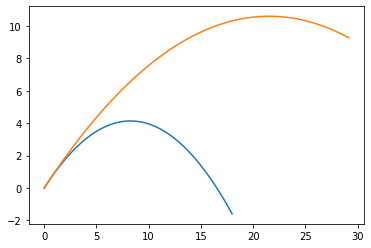

In [8]:
import math
import numpy as np

MODEL_G = 9.81
MODEL_DT = 0.001
MODEL_DM = 0.2
MODEL_U = 28

class Body:
    def __init__(self, x, y, vx, vy):
        
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        
        self.trajectory_x = []
        self.trajectory_y = []
        

    def advance(self):

        self.trajectory_x.append(self.x)
        self.trajectory_y.append(self.y)
        
        self.x += self.vx * MODEL_DT
        self.y += self.vy * MODEL_DT
        self.vy -= MODEL_G * MODEL_DT
        
class Rocket(Body):
    def __init__(self, x, y):
        super().__init__(x, y, 10, 10) # Вызовем конструктор предка — тела, т.к. он для ракеты актуален
        self.m = 63

    def advance(self):
        super().advance() # вызовем метод предка — тела, т.к. и он для ракеты актуален.
        if self.m > 50:
            self.m -= MODEL_DM
            DV = MODEL_U * MODEL_DM / self.m
            V = (self.vx**2 + self.vy**2)**0.5
            self.vx += DV * self.vx / V
            self.vy += DV * self.vy / V

np.sin

b = Body(0, 0, 9, 9)
r = Rocket(0, 0)

bodies = [b, r]
# Дальше мы уже не будем думать, кто тут ёжик, кто ракета, а кто котлета —
# благодаря возможностям ООП будем просто работать со списком тел

for t in np.r_[0:2:MODEL_DT]: # для всех временных отрезков
    for b in bodies: # для всех тел
        b.advance() # выполним шаг
        
%matplotlib inline
from matplotlib import pyplot as pp

for b in bodies: # для всех тел
    pp.plot(b.trajectory_x, b.trajectory_y) # нарисуем их траектории